In [5]:
# dataset source: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Chosen Variables:
# - "child_mort" - Death of children under 5 years of age per 1000 live births
# - "income" - Net income per person
# - "gdpp" - The GDP per capita. Calculated as the Total GDP divided by the total population
# 
# Cluster Profiling:
# 
# Cluster profiling is based on major three factors: child mortality, income and GDP.
# 
# Child mortality show access to basic necessities that lower child mortality, such as nutrition, basic hygiene and basic healthcare. Child mortality is related to total fertility (Factfulness, Hans Rosling). Child mortality is said to be the best predictor of quality of life. (Numbers Don't Lie - 71 Things You Need to Know About the World, Vaclav Smil). Other variables have been chosen based on the graphical analysis.

In [6]:
df = pd.read_csv("Country-data.csv")

In [7]:
# Creating a new dataframe for these variables. 

countries = df[["country", "child_mort", "income", "gdpp"]]

countries_K = df[["child_mort", "income", "gdpp"]] #numeric data set needed for KMeans segmentation

In [8]:
countries.dtypes

country        object
child_mort    float64
income          int64
gdpp            int64
dtype: object

In [9]:
countries.isnull().sum()

country       0
child_mort    0
income        0
gdpp          0
dtype: int64

In [10]:
countries.shape

(167, 4)

In [ ]:
# # Graphical Analysis:

# ### Analysis in order to find 3 variables which will be used in KMeans segmentation method

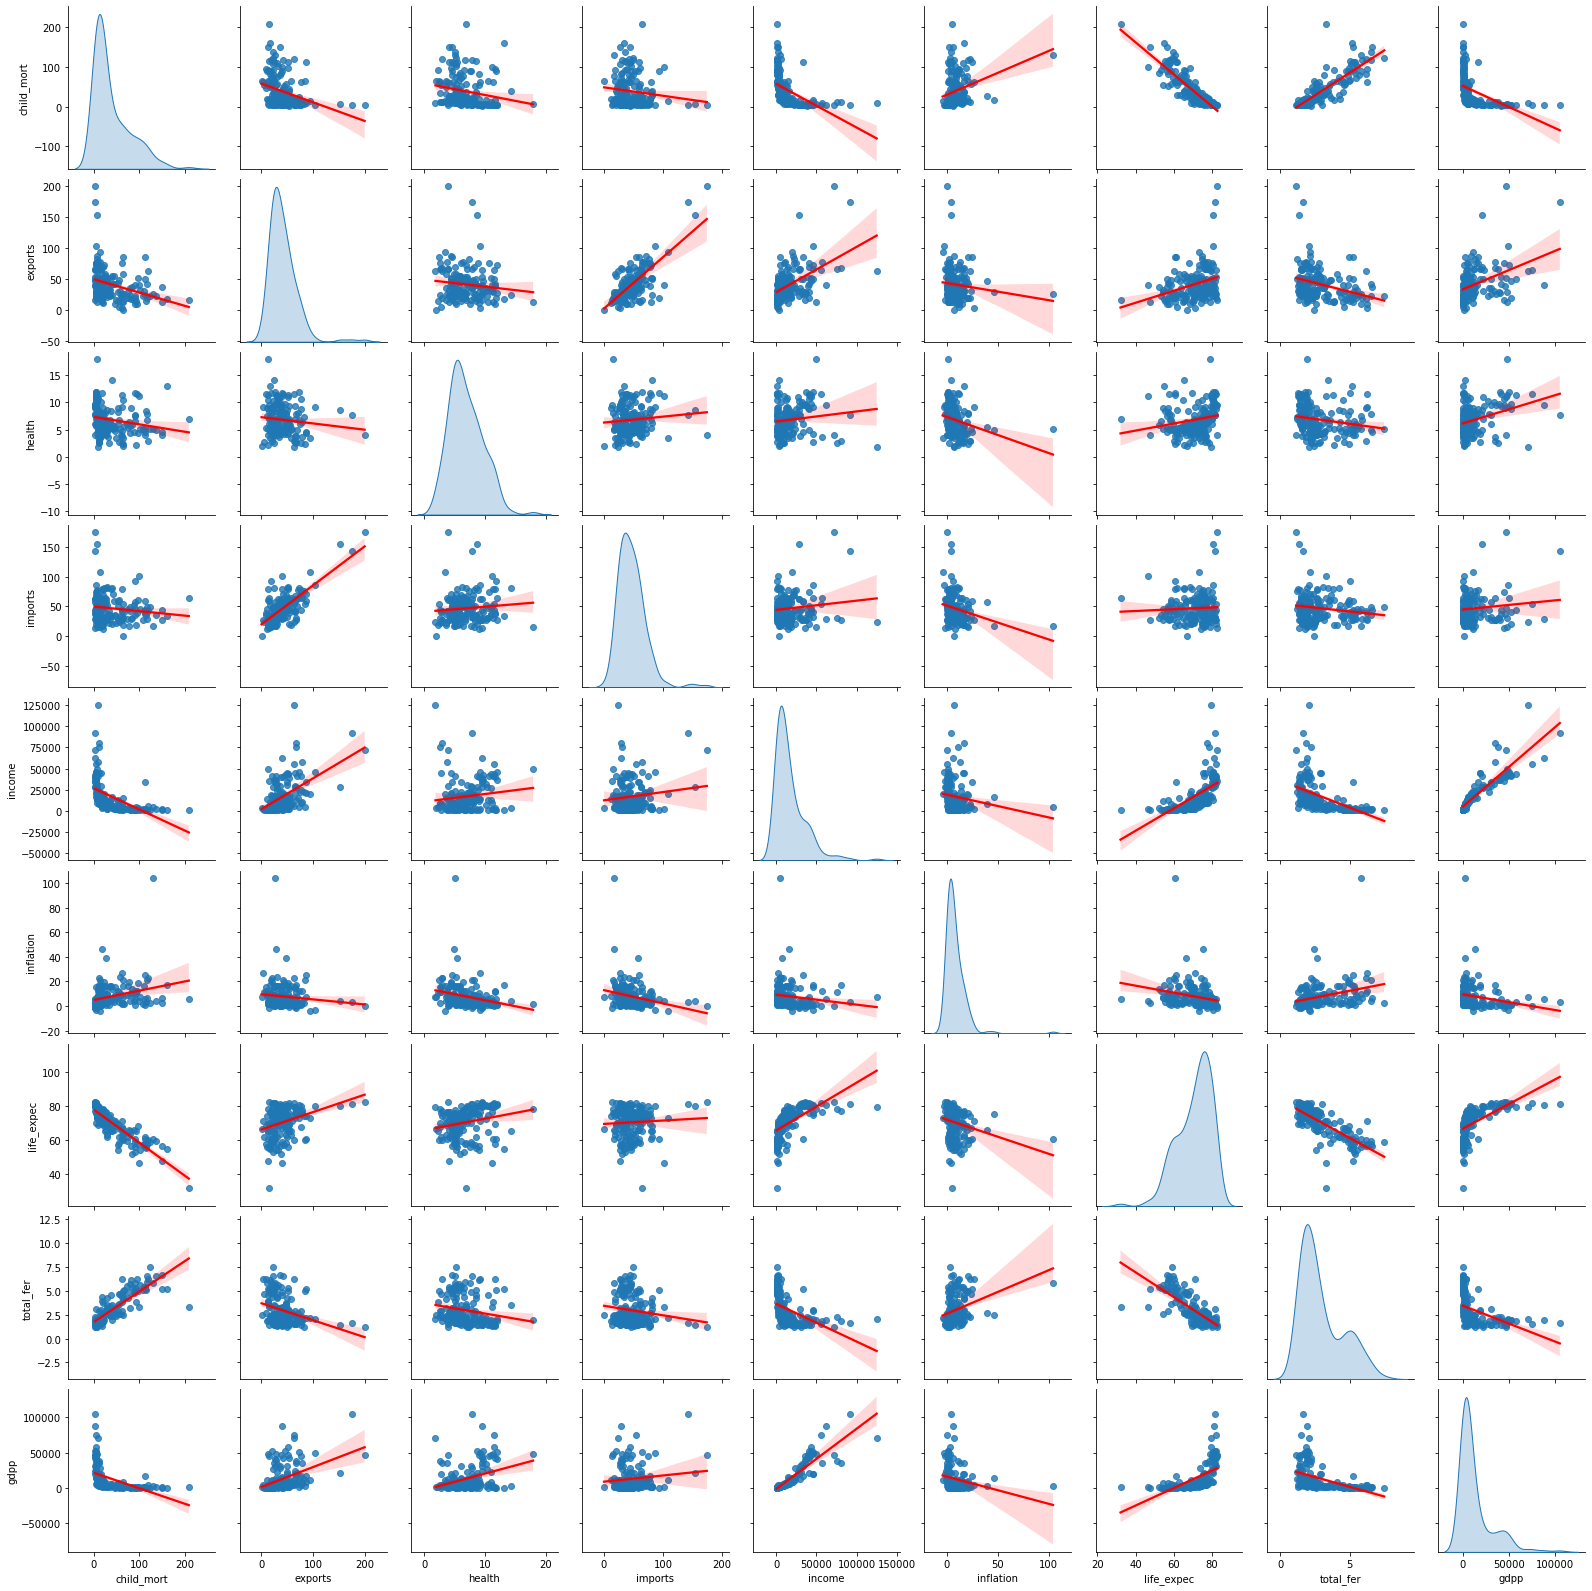

In [11]:
sns.pairplot(df, diag_kind="kde", kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [12]:
# We need to transform the data in order to assess linear relationship between variables
df["inflation"]=abs(df["inflation"])
df["inflation"]
df.drop(columns="country", inplace=True)

In [13]:
#Unskewing data with Box-Cox transformation

def boxcox_df(x):    
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox
df_boxcox = df.apply(boxcox_df, axis=0)

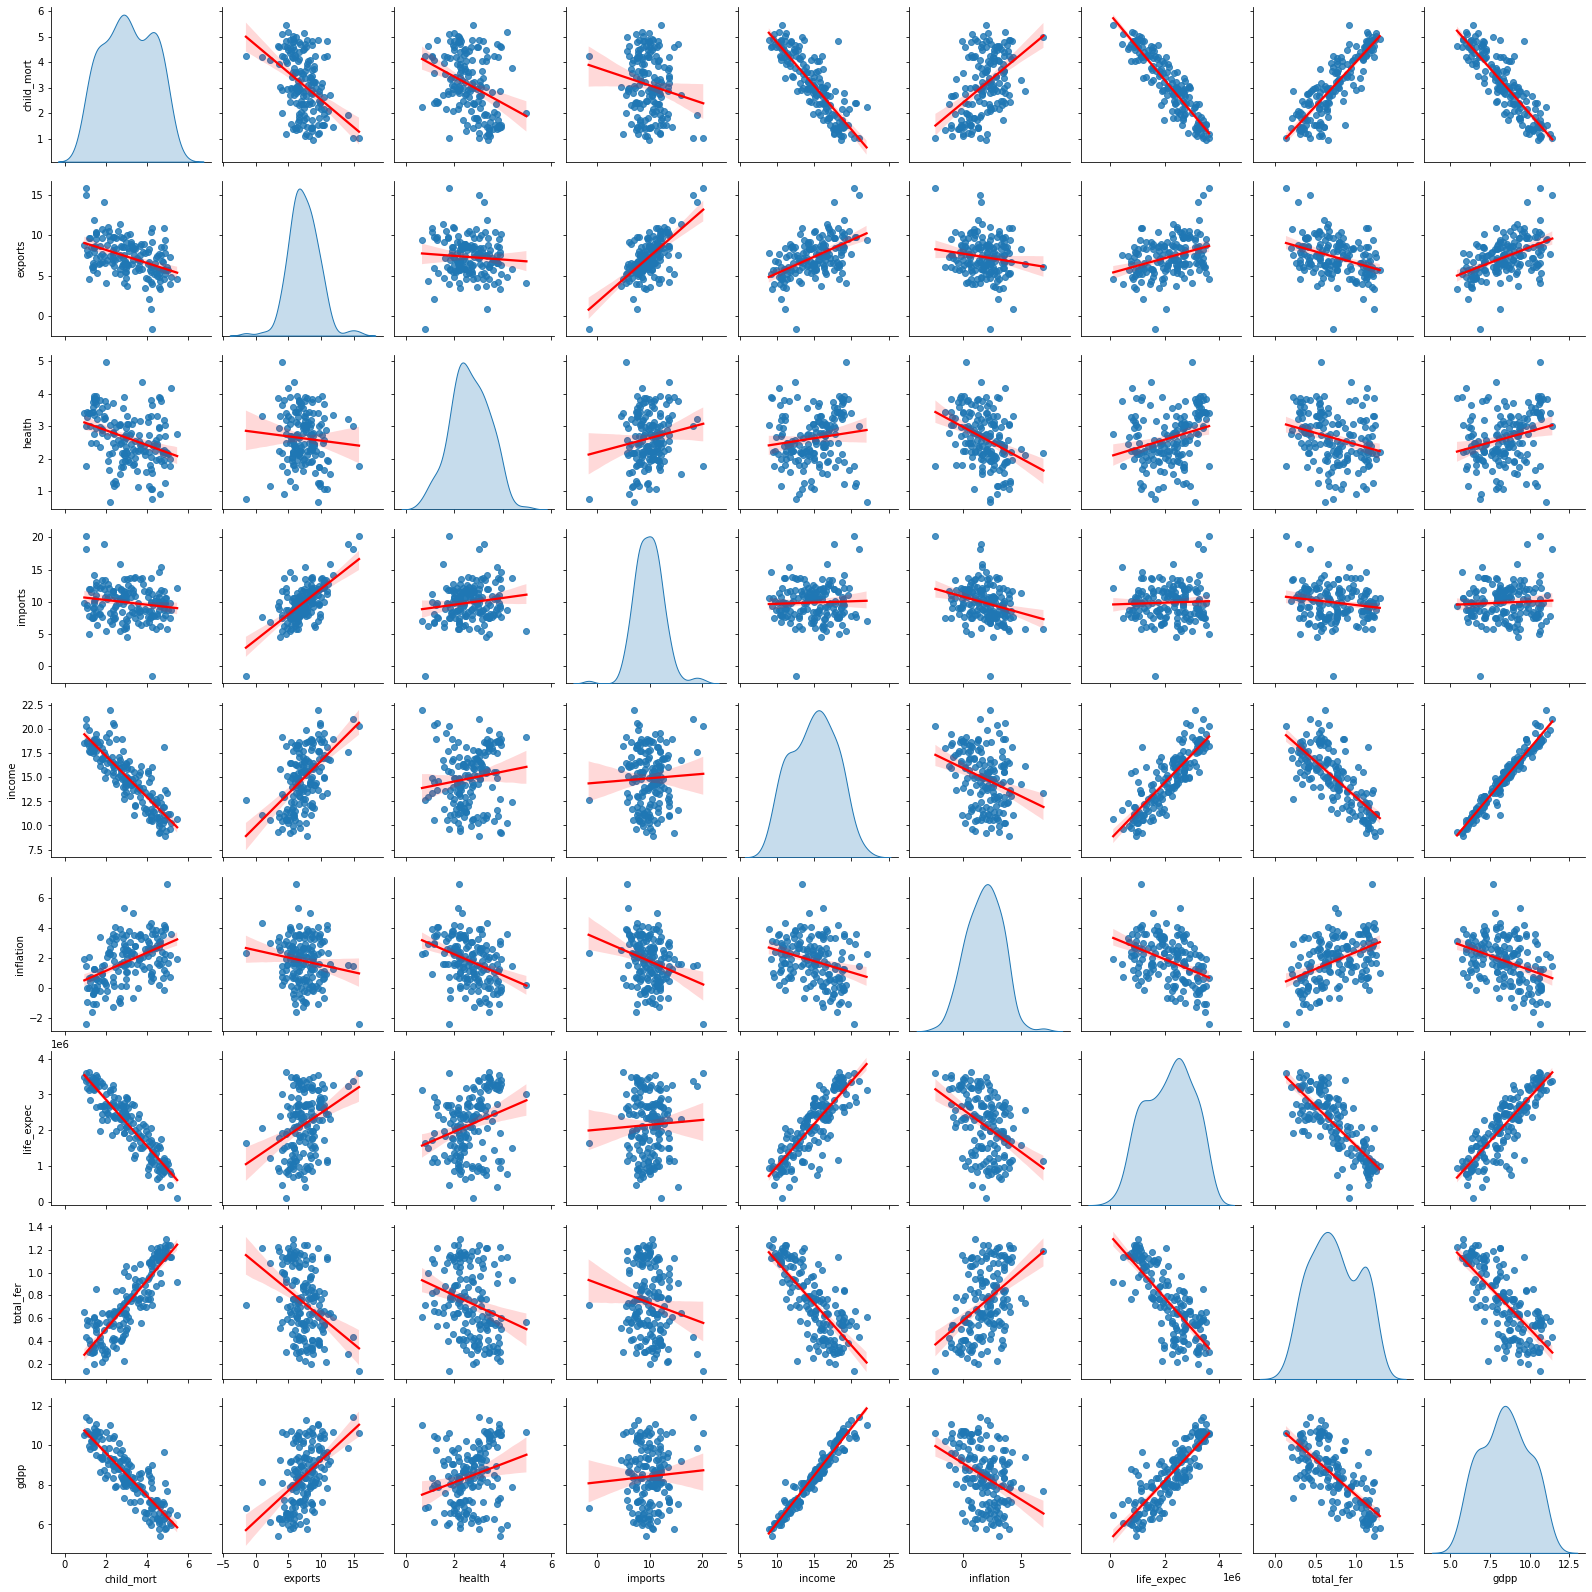

In [14]:
sns.pairplot(df_boxcox, diag_kind="kde", kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [ ]:
# On the chart above we can observe the following relations between variables: 
# 
# 
# 1.   Strong Linear relation can be found between:
# 
# *   **imports** - **exports**
# *   **total_fer** - **child_mort**
# *   **gdpp** - **income**
# 
# 
# 2.   Non-linear relation namely rectangular hyperbola curve between:
# *   **gdpp** - **child_mort**
# 3. We can also notice that the bigger GDP relates to the:
# * lower  child mortality 
# * higger income 
# * lower inflation
# * longer life expectancy
# * lower total fertility

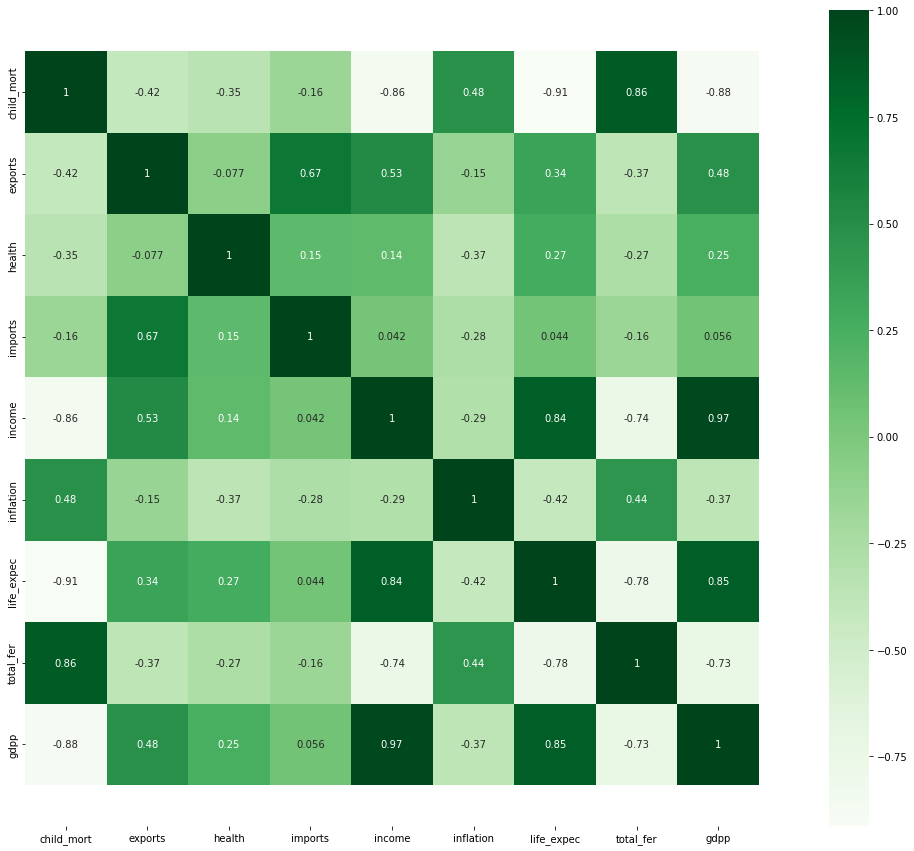

In [15]:
plt.figure(figsize = (25,15))
ax = sns.heatmap(df_boxcox.corr(),square = True,annot=True, cmap="Greens")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [16]:
# Above we can see a heatmap with correlations between variables.
# The most important  insights from it are as follows: 
# 
# *   **child_mort** is having high negative correlation with **life_expec**
# *   **health**, **exports**, **income**,**imports** are highly correlated with **gdpp**
# * **exports** is highly correlated with **imports**
# * **total_fer** is highly positively correlated with **child_mort** and negatively correlated with **life_expec**

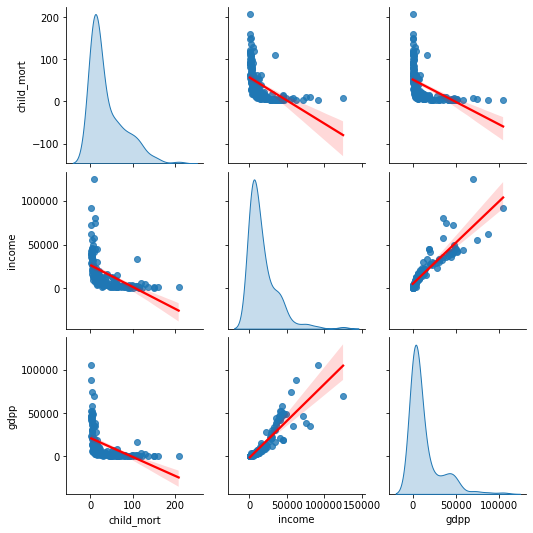

In [17]:
# Relationship between quantitative variables ('child_mort','income', 'gdpp')

sns.pairplot(countries, diag_kind="kde", kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [ ]:
# Rectangular hyperbola curve is generated by gdpp-child_mort. Estimated distributions on the diagonal are **highly skewed** which means they are **not normally distributed**

In [18]:
#Unskewing data with Box-Cox transformation

def boxcox_df(x):    
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox
countries_boxcox = countries_K.apply(boxcox_df, axis=0)

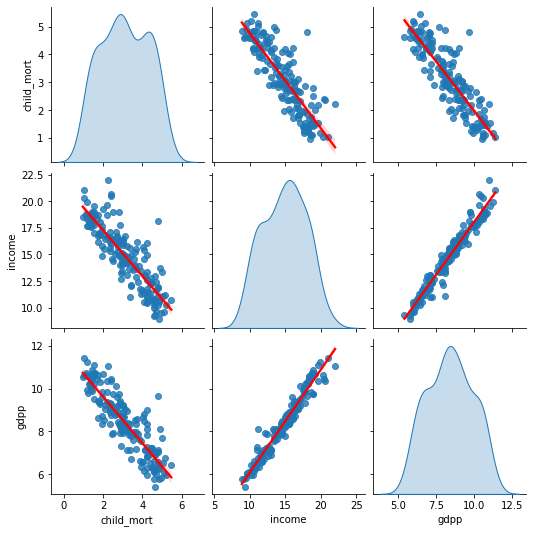

In [19]:
sns.pairplot(countries_boxcox, diag_kind='kde', kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [20]:
# By using Box-Cox transformation we have successfully unskewed the variables and they now are almost normally distributed.

In [ ]:
# Scaling the data

# Scaling works by first subtracting the column average from each individual entry. 
# This step ensures the column average is adjusted to zero. Then we divide the result by each column's standard deviation. This step makes the column's standard deviation equal to 1.
# We  transform the unskewed dataset  to the same scale, meaning all columns have a mean of zero, and standard deviation of 1

In [21]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(countries_boxcox)
countries_scaled = scaler.transform(countries_boxcox)
countries_scaled_df = pd.DataFrame(data=countries_scaled,index=countries_boxcox.index,columns=countries_boxcox.columns)

In [22]:
countries_scaled_df.agg(['mean','std']).round()

,child_mort,income,gdpp
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0


In [23]:
# Elbow criterion method to decide how many clusters to use

# K-means require  value to be set beforehand. 
# There are two ways to define k - either mathematically or by testing different values and exploring the results.
# 
#  We will first test the mathematical approach by using the elbow criterion method. This will get us a ball-park estimate of what is the optimal number of clusters.
# 
#  
# We plot the sum of squared errors again k to identify the so-called elbow - where the decrease in the errors slows down, and there's only incremental reduction with more segments past that point.
# 
# First we initialize an empty dictionary called sse.
#  Then, we run a loop through k values between 1 and 11, and store the sum of squared errors that can be accessed with inertia underscore argument from the fitted kmeans model. Finally, we plot the k values or keys argument of the sse dictionary on the x axis, and the sum of squared errors or values argument in the sse dictionary on the y axi

/Users/ewelinakowalewska/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ewelinakowalewska/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ewelinakowalewska/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ewelinakowalewska/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

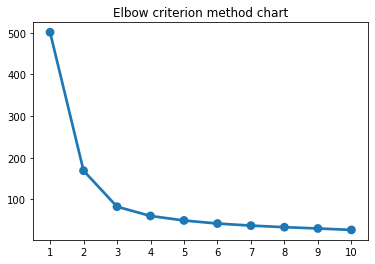

In [24]:
sse = {}

for k in range(1, 11):
    kmeans=KMeans(n_clusters=k, random_state=333)
    kmeans.fit(countries_scaled_df)
    sse[k] = kmeans.inertia_

plt.title('Elbow criterion method chart')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [25]:
# You can see that the "elbow" is somewhere around 2 or 3 clusters, which means it should start cluster with +1 number of clusters i.e. with 3 or 4. We always chose lower so k=3

In [ ]:
# Building segmentation using KMeans

In [26]:
# Initialize `KMeans` with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(countries_scaled_df)

# Assign the generated labels to a new column
countries_kmeans3 = countries.assign(segment = kmeans.labels_)

/Users/ewelinakowalewska/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
#below [countries_clusters] is needed in order to retrieve the country connected with the segment
cluster_K = pd.DataFrame(kmeans.labels_, columns = ['segment'])

In [28]:
countries_clusters = pd.concat([countries, cluster_K], axis=1)
countries_clusters.head()

,country,child_mort,income,gdpp,segment
0,Afghanistan,90.2,1610,553,0
1,Albania,16.6,9930,4090,2
2,Algeria,27.3,12900,4460,2
3,Angola,119.0,5900,3530,0
4,Antigua and Barbuda,10.3,19100,12200,2


In [29]:
#Analyzing average K-means segmentation attributes
kmeans3_averages = countries_kmeans3.groupby(['segment']).mean().round(0)
print(kmeans3_averages)

         child_mort   income     gdpp
segment                              
0              86.0   2394.0   1054.0
1               6.0  40577.0  35545.0
2              24.0  11806.0   6031.0


In [30]:
# Cluster visualization
# On the charts below we can observe the differences between 
# '**gdpp**', '**child_mort**' and '**income**' in presented clusters of countries. Analisys of those clusters can allow us to distinguish  clusters of developed countries from the clusters of under-developed countries.

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

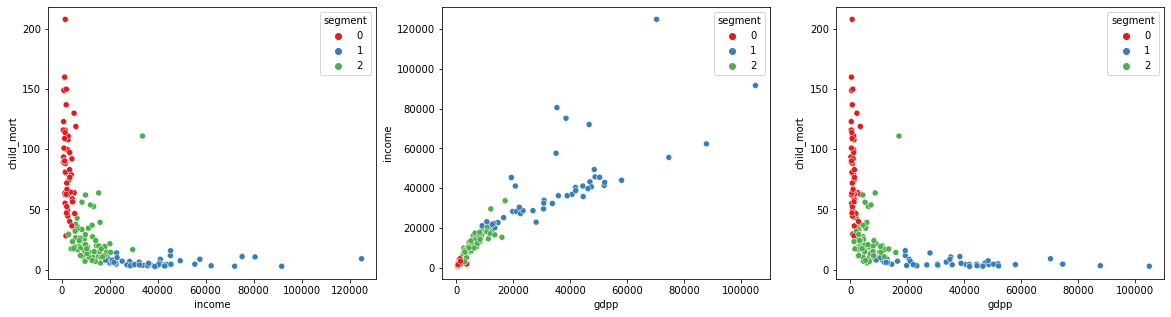

In [31]:
# Scatter-Plot : 

f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='income', y='child_mort', hue='segment', data=countries_kmeans3, palette='Set1',ax=axes[0]);
sns.scatterplot(x='gdpp', y='income', hue='segment', data=countries_kmeans3, palette='Set1',ax=axes[1]);
sns.scatterplot(x='gdpp', y='child_mort', hue='segment', data=countries_kmeans3, palette='Set1',ax=axes[2])

In [32]:
# Homogeneity analisys of segments presented on charts above: 
# 
# We can observe that: 
# * Countries clustered in "Semgent 0" are homogeneous taking into consideration **gdpp** & **income**. However the **child_mort** rates an differ quite a lot. 
# * Segment 2 is the most homogeneous one.
# * Countries clustered in "Semgent 1" are homogeneous taking into consideration **child_mort**. 
# However the **gdpp** & **income** values can differ inside the segment significantly. 

<AxesSubplot:xlabel='segment'>

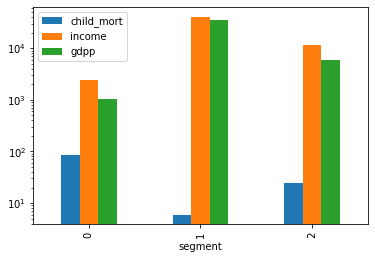

In [33]:
# Visualising the profiled variables of the dataset via barplot
kmeans3_averages.plot(kind='bar', logy=True)

#### What we can learn from those charts? 
* Countries with high gdpp, high income and low child mortality we can label as **Developed countries** 
* Countries with low gdpp,income and low child mortality are **Developing countries**
* Countries with low gdpp,low income and high child mortality cab be labeled as **Under-developed countries**